In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]


LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Clustered Data

In [3]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


# convert to list

In [4]:
df_clustered['combined_similarity_photo_like'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_comment'].fillna("--", inplace=True)

df_clustered['comment_id'].fillna("--", inplace=True)
df_clustered['comment_created_at'].fillna("--", inplace=True)
df_clustered['comment_post_shortcode'].fillna("--", inplace=True)
df_clustered['comment_shortcode_username'].fillna("--", inplace=True)
df_clustered['comment_text'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_comment'].fillna("--", inplace=True)

df_clustered['like_id'].fillna("--", inplace=True)
df_clustered['like_post_shortcode'].fillna("--", inplace=True)
df_clustered['like_shortcode_username'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_like'].fillna("--", inplace=True)

# Calculate comment age

In [5]:
def convert_to_list(_row):
    
    converted_list = []
    if (not _row['comment_id'] == "--"):
        converted_list = _row['comment_id'].split(",,,")
    _row['comment_id'] = converted_list
    
    converted_list = []
    if (not _row['comment_created_at'] == "--"):
        converted_list = _row['comment_created_at'].split(",,,")
    _row['comment_created_at'] = converted_list
    
    converted_list = []
    if (not _row['comment_post_shortcode'] == "--"):
        converted_list = _row['comment_post_shortcode'].split(",,,")
    _row['comment_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['comment_shortcode_username'] == "--"):
        converted_list = _row['comment_shortcode_username'].split(",,,")
    _row['comment_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['comment_text'] == "--"):
        converted_list = _row['comment_text'].split(",,,")
    _row['comment_text'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_comment'] == "--"):
        converted_list = _row['combined_similarity_photo_comment'].split(",,,")
    _row['combined_similarity_photo_comment'] = converted_list
    
    
    
    
    converted_list = []
    if (not _row['like_id'] == "--"):
        converted_list = _row['like_id'].split(",,,")
    _row['like_id'] = converted_list
    
    converted_list = []
    if (not _row['like_post_shortcode'] == "--"):
        converted_list = _row['like_post_shortcode'].split(",,,")
    _row['like_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['like_shortcode_username'] == "--"):
        converted_list = _row['like_shortcode_username'].split(",,,")
    _row['like_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_like'] == "--"):
        converted_list = _row['combined_similarity_photo_like'].split(",,,")
    _row['combined_similarity_photo_like'] = converted_list
    
    
    return _row

df_clustered = df_clustered.apply(convert_to_list, axis=1)

In [6]:
def get_post_date(_row):
    
    date_list = []
    
    if (not _row['comment_total'] == 0):
        
        post_shortcodes = _row['comment_post_shortcode']
        for shortcode in post_shortcodes:
            post = instagram_col_post.find_one( { "shortcode" : shortcode }, {'date_utc': 1} )
            date_list.append(post['date_utc'])

    _row['comment_post_date'] = date_list
        
    return _row

In [7]:
df_clustered = df_clustered.apply(get_post_date, axis=1)

In [8]:
def calculate_age(_row):
       
    list_diff_in_sec = []
    avg = 0
      
    if (not _row['comment_total'] == 0):
        
        post_dates = _row['comment_post_date']
        comment_dates =  _row['comment_created_at']
        
        total_diff_in_second = 0
        
        for i in range(len(post_dates)):
            
            post_time = pd.to_datetime(post_dates[i], format='%Y-%m-%d %H:%M:%S')
            comment_time = pd.to_datetime(comment_dates[i], format='%Y-%m-%d %H:%M:%S')
            
            dif = (comment_time - post_time)
#             time_difference_in_minutes = dif / timedelta(minutes=1)
            total_diff_in_second += dif.total_seconds()
            list_diff_in_sec.append(str(dif.total_seconds()))
#             sec = timedelta(seconds=list_diff[0])
#             time = str(sec)
#             print(time)

        avg = total_diff_in_second / len(post_dates)
    
    _row['comment_avg_age_sec'] = avg
    
#     myString = ",,,".join(list_diff_in_sec)
    _row['comment_age_sec'] = list_diff_in_sec

    return _row

In [9]:
df_clustered = df_clustered.apply(calculate_age, axis=1)

# Clusters

In [10]:
class_method = 'class kmeans 3'
df_grouped = df_clustered.groupby(class_method)
groups = df_grouped.groups

In [11]:
grouped_c0_fan = df_grouped.get_group(1)
grouped_c1_ordinary = df_grouped.get_group(0)
grouped_c2_botlike = df_grouped.get_group(2)

c0_name_fan = 'C0-Fan-page'
c1_name_ordinary = 'C1-Ordinary-User'
c2_name_botlike = 'C2-Botlike'

In [12]:
print(grouped_c0_fan.shape[0])
print(grouped_c1_ordinary.shape[0])
print(grouped_c2_botlike.shape[0])

2102
1337
393


In [13]:
print(grouped_c0_fan['comment_total'].mean())
print(grouped_c1_ordinary['comment_total'].mean())
print(grouped_c2_botlike['comment_total'].mean())

1.1988582302568982
1.5699326851159312
0.544529262086514


In [14]:
print(grouped_c0_fan['like_total'].mean())
print(grouped_c1_ordinary['like_total'].mean())
print(grouped_c2_botlike['like_total'].mean()) 

0.4738344433872502
0.4869109947643979
0.26717557251908397


# Get all dataframes

In [15]:
def get_row_data_comment(_row, _id):

    tt = _row.iloc[0]

    _row['comment_id'] = tt['comment_id'][_id]
    _row['comment_created_at'] = tt['comment_created_at'][_id]
    _row['comment_post_shortcode'] = tt['comment_post_shortcode'][_id]
    _row['comment_shortcode_username'] = tt['comment_shortcode_username'][_id]
    _row['comment_text'] = tt['comment_text'][_id]
    _row['combined_similarity_photo_comment'] = tt['combined_similarity_photo_comment'][_id]
    _row['comment_post_date'] = tt['comment_post_date'][_id]
    _row['comment_age_sec'] = tt['comment_age_sec'][_id]

    return _row

In [16]:
def get_row_data_like(_row, _id):
    
    tt = _row.iloc[0]
    _row['like_id'] = tt['like_id'][_id]
    _row['like_post_shortcode'] = tt['like_post_shortcode'][_id]
    _row['like_shortcode_username'] = tt['like_shortcode_username'][_id]
    return _row


In [17]:
# get all dataframes

def get_dataframes(_df):
    
    #politicians
    df_c2_trump = _df[0:0]
    df_c2_comment_trump = _df[0:0]
    df_c2_like_trump = _df[0:0]

    df_c2_obama = _df[0:0]
    df_c2_comment_obama = _df[0:0]
    df_c2_like_obama = _df[0:0]

    df_c2_macron = _df[0:0]
    df_c2_comment_macron = _df[0:0]
    df_c2_like_macron = _df[0:0]

    df_c2_may = _df[0:0]
    df_c2_comment_may = _df[0:0]
    df_c2_like_may = _df[0:0]

    #news agencies
    df_c2_bbc = _df[0:0]
    df_c2_comment_bbc = _df[0:0]
    df_c2_like_bbc = _df[0:0]

    df_c2_cnn = _df[0:0]
    df_c2_comment_cnn = _df[0:0]
    df_c2_like_cnn = _df[0:0]

    df_c2_foxnews = _df[0:0]
    df_c2_comment_foxnews = _df[0:0]
    df_c2_like_foxnews = _df[0:0]

    df_c2_reuters = _df[0:0]
    df_c2_comment_reuters = _df[0:0]
    df_c2_like_reuters = _df[0:0]

    #sports star
    df_c2_messi = _df[0:0]
    df_c2_comment_messi = _df[0:0]
    df_c2_like_messi = _df[0:0]

    df_c2_ronaldo = _df[0:0]
    df_c2_comment_ronaldo = _df[0:0]
    df_c2_like_ronaldo = _df[0:0]

    df_c2_nadal = _df[0:0]
    df_c2_comment_nadal = _df[0:0]
    df_c2_like_nadal = _df[0:0]

    df_c2_federer = _df[0:0]
    df_c2_comment_federer = _df[0:0]
    df_c2_like_federer = _df[0:0]



    for index, row in _df.iterrows():

        #comment
        if (len(row['comment_shortcode_username']) > 0 ):
            for j in range(len(row['comment_shortcode_username'])):
                _name = row['comment_shortcode_username']

                #politicians
                if (_name[j] == DONALD_TRUMP):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_trump = pd.concat([df_c2_comment_trump, df_row])

                if (_name[j] == BARACK_OBAMA):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_obama = pd.concat([df_c2_comment_obama, df_row])

                if (_name[j] == EMMANUEL_MACRON):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_macron = pd.concat([df_c2_comment_macron, df_row])

                if (_name[j] == THERESA_MAY):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_may = pd.concat([df_c2_comment_may, df_row])


                #News agencies
                if (_name[j] == BBC):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_bbc = pd.concat([df_c2_comment_bbc, df_row])

                if (_name[j] == CNN):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_cnn = pd.concat([df_c2_comment_cnn, df_row])

                if (_name[j] == FOXNEWS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_foxnews = pd.concat([df_c2_comment_foxnews, df_row])

                if (_name[j] == REUTERS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_reuters = pd.concat([df_c2_comment_reuters, df_row])


                #Sports star
                if (_name[j] == LEOMESSI):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_messi = pd.concat([df_c2_comment_messi, df_row])

                if (_name[j] == CRISTIANO_RONALDO):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_ronaldo = pd.concat([df_c2_comment_ronaldo, df_row])

                if (_name[j] == RAFAEL_NADAL):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_nadal = pd.concat([df_c2_comment_nadal, df_row])

                if (_name[j] == ROGER_FEDERER):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_federer = pd.concat([df_c2_comment_federer, df_row])


        #like
        if (len(row['like_shortcode_username']) > 0 ):
            for j in range(len(row['like_shortcode_username'])):
                _name = row['like_shortcode_username']

                #politicians
                if (_name[j] == DONALD_TRUMP):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_trump = pd.concat([df_c2_like_trump, df_row])

                if (_name[j] == BARACK_OBAMA):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_obama = pd.concat([df_c2_like_obama, df_row])

                if (_name[j] == EMMANUEL_MACRON):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_macron = pd.concat([df_c2_like_macron, df_row])

                if (_name[j] == THERESA_MAY):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_may = pd.concat([df_c2_like_may, df_row])


                #news agencies
                if (_name[j] == BBC):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_bbc = pd.concat([df_c2_like_bbc, df_row])

                if (_name[j] == CNN):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_cnn = pd.concat([df_c2_like_cnn, df_row])

                if (_name[j] == FOXNEWS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_foxnews = pd.concat([df_c2_like_foxnews, df_row])

                if (_name[j] == REUTERS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_reuters = pd.concat([df_c2_like_reuters, df_row])


                #sports star
                if (_name[j] == LEOMESSI):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_messi = pd.concat([df_c2_like_messi, df_row])

                if (_name[j] == CRISTIANO_RONALDO):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_ronaldo = pd.concat([df_c2_like_ronaldo, df_row])

                if (_name[j] == RAFAEL_NADAL):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_nadal = pd.concat([df_c2_like_nadal, df_row])

                if (_name[j] == ROGER_FEDERER):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_federer = pd.concat([df_c2_like_federer, df_row])

    return df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may, df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters, df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer, df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may, df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters, df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer

In [18]:
df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may, df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters, df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer, df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may, df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters, df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer = get_dataframes(grouped_c0_fan)
df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may, df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters, df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer, df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may, df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters, df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer = get_dataframes(grouped_c1_ordinary)
df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may, df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters, df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer, df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may, df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters, df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer = get_dataframes(grouped_c2_botlike)

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [19]:
# df_c2_comment_trump

In [20]:
# df of all users reacted in each usecase - c2

#politicians
df_c2_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

In [21]:
# df all comment - c2

df_c0_comments = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may,
                           df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters,
                            df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer,
                           ])


df_c1_comments = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may,
                           df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters,
                            df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer,
                           ])


df_c2_comments = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may,
                           df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters,
                            df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer,
                           ])

In [22]:
df_c0_comments.shape[0]

2519

In [23]:
df_c1_comments.shape[0]

2087

In [24]:
df_c2_comments.shape[0]

213

In [25]:
df_c0_comments.columns

Index(['Unnamed: 0', 'username', 'name', 'bio', 'photo', 'nfollower',
       'nfollowee', 'nmediacount', 'follower', 'followee', 'mediacount',
       'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class', 'class BGM 3',
       'class GM 3', 'class kmeans 3', 'class spectral 3', 'class GM 4',
       'owener_id', 'combined_owener_external_url', 'combined_username',
       'combined_full_name', 'combined_profile_pic_url', 'combined_biography',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like',
       'comment_created_at', 'comment_id', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'comment_total',
       'like_total', 'like_shortcode_username', 'like_post_shortcode',
       'like_id', 'comment_post_date', 'comment_avg_age_sec',
       'comment_age_sec'],
      dtype='object')

In [26]:
def get_unique_post_count(_df_comment, _df_like):
    
    comment = pd.unique(_df_comment['comment_post_shortcode']).tolist()
    like = pd.unique(_df_like['like_post_shortcode']).tolist()
    list_all = []
    list_all.extend(like)
    list_all.extend(comment)

    return list_all

In [27]:
#unique post count

#politicians
list_shortcode_trump = get_unique_post_count(df_c2_comment_trump, df_c2_like_trump)
list_shortcode_obama = get_unique_post_count(df_c2_comment_obama, df_c2_like_obama)
list_shortcode_macron = get_unique_post_count(df_c2_comment_macron, df_c2_like_macron)
list_shortcode_may = get_unique_post_count(df_c2_comment_may, df_c2_like_may)
print(len(list_shortcode_trump))
print(len(list_shortcode_obama))
print(len(list_shortcode_macron))
print(len(list_shortcode_may))

#news agencies
list_shortcode_bbc = get_unique_post_count(df_c2_comment_bbc, df_c2_like_bbc)
list_shortcode_cnn = get_unique_post_count(df_c2_comment_cnn, df_c2_like_cnn)
list_shortcode_foxnews = get_unique_post_count(df_c2_comment_foxnews, df_c2_like_foxnews)
list_shortcode_reuters = get_unique_post_count(df_c2_comment_reuters, df_c2_like_reuters)
print(len(list_shortcode_cnn))


#sports star
list_shortcode_messi = get_unique_post_count(df_c2_comment_messi, df_c2_like_messi)
list_shortcode_ronaldo = get_unique_post_count(df_c2_comment_ronaldo, df_c2_like_ronaldo)
list_shortcode_nadal = get_unique_post_count(df_c2_comment_nadal, df_c2_like_nadal)
list_shortcode_federer = get_unique_post_count(df_c2_comment_federer, df_c2_like_federer)

49
3
20
82
0


In [28]:
# get average like & comment per each usecase
# (number of total like (comment) / unique count of posts)

#Politicians
list_c2_like_politicians = []
list_c2_comment_politicians = []

t = df_c2_like_trump.shape[0] / len(list_shortcode_trump)
print("trume like: " + str(t))
list_c2_like_politicians.append(t)

t = df_c2_comment_trump.shape[0] / len(list_shortcode_trump)
print("trume comment: " + str( t ))
list_c2_comment_politicians.append(t)

t = df_c2_like_obama.shape[0] / len(list_shortcode_obama)
print("obama like: " + str( t ))
list_c2_like_politicians.append(t)

t = df_c2_comment_obama.shape[0] / len(list_shortcode_obama)
print("obama comment: " + str( t ))
list_c2_comment_politicians.append(t)

t = df_c2_like_macron.shape[0] / len(list_shortcode_macron)
print("macron like: " + str( t ))
list_c2_like_politicians.append(t)

t = df_c2_comment_macron.shape[0] / len(list_shortcode_macron)
print("macron comment: " + str( t ))
list_c2_comment_politicians.append(t)

t = df_c2_like_may.shape[0] / len(list_shortcode_may)
print("may like: " + str( t ))
list_c2_like_politicians.append(t)

t = df_c2_comment_may.shape[0] / len(list_shortcode_may)
print("may comment: " + str( t ))
list_c2_comment_politicians.append(t)

trume like: 0.6530612244897959
trume comment: 1.8979591836734695
obama like: 1.6666666666666667
obama comment: 0.0
macron like: 0.9
macron comment: 0.4
may like: 0.926829268292683
may comment: 0.43902439024390244


In [29]:
#News agencies

list_c2_comment_newsagencies = []
list_c2_like_newsagencies = []

t = df_c2_like_bbc.shape[0] / len(list_shortcode_bbc) if len(list_shortcode_cnn) != 0 else 0
print("bbc like: " + str( t ))
list_c2_like_newsagencies.append(t)

t = df_c2_comment_bbc.shape[0] / len(list_shortcode_bbc)  if len(list_shortcode_cnn) != 0 else 0
print("bbc comment: " + str( t ))
list_c2_comment_newsagencies.append(t)

t = df_c2_like_cnn.shape[0] / len(list_shortcode_cnn) if len(list_shortcode_cnn) != 0 else 0
print("cnn like: " + str( t ))
list_c2_like_newsagencies.append(t)

t = df_c2_comment_cnn.shape[0] / len(list_shortcode_cnn)  if len(list_shortcode_cnn) != 0 else 0
print("cnn comment: " + str(  ))
list_c2_comment_newsagencies.append(t)

t = df_c2_like_foxnews.shape[0] / len(list_shortcode_foxnews) if len(list_shortcode_cnn) != 0 else 0
print("foxnews like: " + str( t ))
list_c2_like_newsagencies.append(t)

t = df_c2_comment_foxnews.shape[0] / len(list_shortcode_foxnews) if len(list_shortcode_cnn) != 0 else 0
print("foxnews comment: " + str( t ))
list_c2_comment_newsagencies.append(t)

t = df_c2_like_reuters.shape[0] / len(list_shortcode_reuters) if len(list_shortcode_cnn) != 0 else 0
print("reuters like: " + str( t ))
list_c2_like_newsagencies.append(t)

t = df_c2_comment_reuters.shape[0] / len(list_shortcode_reuters) if len(list_shortcode_cnn) != 0 else 0
print("reuters comment: " + str( t ))
list_c2_comment_newsagencies.append(t)

bbc like: 0
bbc comment: 0
cnn like: 0
cnn comment: 
foxnews like: 0
foxnews comment: 0
reuters like: 0
reuters comment: 0


In [30]:
#Sports stars

list_c2_comment_sports = []
list_c2_like_sports = []

t = df_c2_like_messi.shape[0] / len(list_shortcode_messi)
print("messi like: " + str( t ))
list_c2_like_sports.append(t)

t = df_c2_comment_messi.shape[0] / len(list_shortcode_messi)
print("messi comment: " + str( t ))
list_c2_comment_sports.append(t)

t = df_c2_like_ronaldo.shape[0] / len(list_shortcode_ronaldo)
print("ronalod like: " + str( t))
list_c2_like_sports.append(t)

t = df_c2_comment_ronaldo.shape[0] / len(list_shortcode_ronaldo)
print("ronalod comment: " + str( t))
list_c2_comment_sports.append(t)

t = df_c2_like_nadal.shape[0] / len(list_shortcode_nadal)
print("nadal like: " + str( t ))
list_c2_like_sports.append(t)

t = df_c2_comment_nadal.shape[0] / len(list_shortcode_nadal)
print("nadal comment: " + str( t ))
list_c2_comment_sports.append(t)

t = df_c2_like_federer.shape[0] / len(list_shortcode_federer)
print("federer like: " + str( t ))
list_c2_like_sports.append(t)

t = df_c2_comment_federer.shape[0] / len(list_shortcode_federer)
print("federer comment: " + str( t ))
list_c2_comment_sports.append(t)



messi like: 3.7
messi comment: 2.2
ronalod like: 32.55555555555556
ronalod comment: 5.0
nadal like: 4.125
nadal comment: 1.125
federer like: 12.0
federer comment: 0.0


In [31]:
list_c2_like_all = []
list_c2_comment_all = []

list_c2_like_all.extend(list_c2_like_politicians)
list_c2_like_all.extend(list_c2_like_newsagencies)
list_c2_like_all.extend(list_c2_like_sports)

list_c2_comment_all.extend(list_c2_comment_politicians)
list_c2_comment_all.extend(list_c2_comment_newsagencies)
list_c2_comment_all.extend(list_c2_comment_sports)

list_unique_shortcodes = []
list_unique_shortcodes.append(len(list_shortcode_trump))
list_unique_shortcodes.append(len(list_shortcode_obama))
list_unique_shortcodes.append(len(list_shortcode_macron))
list_unique_shortcodes.append(len(list_shortcode_may))
list_unique_shortcodes.append(len(list_shortcode_bbc))
list_unique_shortcodes.append(len(list_shortcode_cnn))
list_unique_shortcodes.append(len(list_shortcode_foxnews))
list_unique_shortcodes.append(len(list_shortcode_reuters))
list_unique_shortcodes.append(len(list_shortcode_messi))
list_unique_shortcodes.append(len(list_shortcode_ronaldo))
list_unique_shortcodes.append(len(list_shortcode_nadal))
list_unique_shortcodes.append(len(list_shortcode_federer))

In [32]:
df_c2_impersonator_detail = pd.DataFrame({'avg like': list_c2_like_all, 'avg comment': list_c2_comment_all,
                                         'unique shortcode' : list_unique_shortcodes
                                         }, index=LIST_ALL_USERS)

In [33]:
def normalize_impersonator(_row):
    
    _row['n avg like'] = (_row['avg like'] * 100) / _row['unique shortcode']
    _row['n avg comment'] = (_row['avg comment'] * 100) / _row['unique shortcode']
    
    return _row

df_c2_impersonator_detail = df_c2_impersonator_detail.apply(normalize_impersonator, axis=1)

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


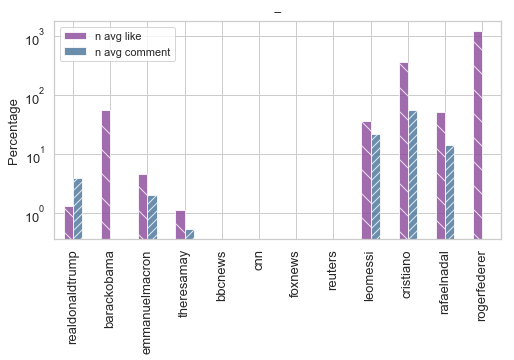

In [34]:
def plot_1():
    
    sns.set(style="whitegrid")
    fig, (ax1) = plt.subplots(1,1, figsize=(8,4))

    ax1 = df_c2_impersonator_detail[['n avg like','n avg comment']].plot.bar(rot=90, ax=ax1, color=['#8a4799', '#477299'], alpha= 0.8)
#     ax1.set_xlabel("")
    ax1.set_ylabel("Percentage")
    ax1.set_yscale('log')
    ax1.set_title("--")
    
    bars = ax1.patches
    patterns =('\\','///')
    hatches = [p for p in patterns for i in range(len(df_c2_impersonator_detail))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
        
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning11_P1.pdf", bbox_inches='tight')
    
plot_1()

In [35]:
df_c2_impersonator_detail

avg like  avg comment  unique shortcode   n avg like  \
realdonaldtrump   0.653061     1.897959              49.0     1.332778   
barackobama       1.666667     0.000000               3.0    55.555556   
emmanuelmacron    0.900000     0.400000              20.0     4.500000   
theresamay        0.926829     0.439024              82.0     1.130280   
bbcnews           0.000000     0.000000               0.0          NaN   
cnn               0.000000     0.000000               0.0          NaN   
foxnews           0.000000     0.000000               0.0          NaN   
reuters           0.000000     0.000000               0.0          NaN   
leomessi          3.700000     2.200000              10.0    37.000000   
cristiano        32.555556     5.000000               9.0   361.728395   
rafaelnadal       4.125000     1.125000               8.0    51.562500   
rogerfederer     12.000000     0.000000               1.0  1200.000000   

                 n avg comment  
realdonaldtrump       3.873386  
barackobama           0.000000  
emmanuelmacron        2.000000  
theresamay            0.535396  
bbcnews                    NaN  
cnn                        NaN  
foxnews                    NaN  
reuters                    NaN  
leomessi             22.000000  
cristiano            55.555556  
rafaelnadal          14.062500  
rogerfederer          0.000000

In [36]:
ALL_DF_COMMENT = [df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may,
                 df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters,
                  df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer
                 ]

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


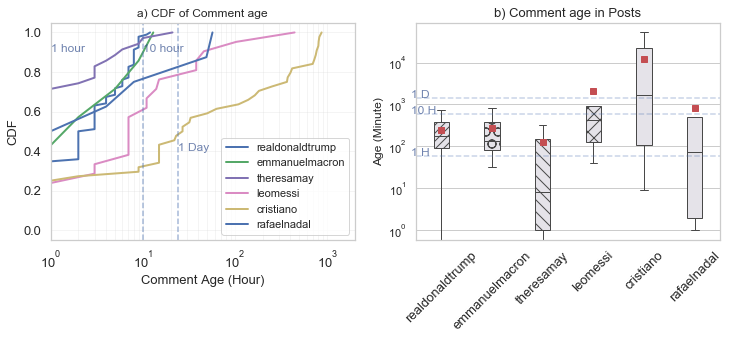

In [37]:
def plot_2():
    
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    
    
    df_boxplot = pd.DataFrame()
    
    for j in range(len(ALL_DF_COMMENT)):
        _df = ALL_DF_COMMENT[j]
        if (_df.shape[0] != 0):
        
            list_imposter_all = _df['comment_age_sec']
            list_imposter_all = list(map(float, list_imposter_all))
            list_impostor_day = []
            list_impostor_min = []

            for i in list_imposter_all:
                # Obtain the total minutes
                totalMinutes = i // 60
                # Obtain the total hours
                totalHours = totalMinutes // 60
            #     sec = timedelta(seconds=i)
                totalday = totalHours // 24
                list_impostor_min.append(totalMinutes)
                list_impostor_day.append(totalHours)

            datam2 =  pd.DataFrame(list_impostor_min)
            datam2.columns = ['period']
            
            data =  pd.DataFrame(list_impostor_day)
            data.columns = ['period']
            
            ser = data[['period']].copy()
            ser = ser.sort_values(by='period')
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser)
        #     ser_cdf.index.name = "Comment Age (hour)"    
            ax5 = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label=LIST_ALL_USERS[j])
            
            df_boxplot[LIST_ALL_USERS[j]] = datam2['period']


    ax5.axes.set_xlim([0,2000])
    
    for item in ([ax5.title, ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()): item.set_fontsize(13)

    ax5.set_ylabel("CDF")
    ax5.set_xlabel("Comment Age (Hour)")
    
    ax5.set_title("a) CDF of Comment age")
    
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.9, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
#     ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
#     ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    
    

    

    #box plot
    boxplot2 = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=ax2)
    boxplot2.plot(df_boxplot.mean(), 'rs')
#     boxplot2.set_xlabel("Clusters")
    boxplot2.set_ylabel("Age (Minute)")
    boxplot2.set_yscale('log')
    boxplot2.set_title("b) Comment age in Posts")
    boxplot2.xaxis.set_tick_params(rotation=45)
    
    
    for j in range(len(df_boxplot.columns)):
        mybox = boxplot2.artists[j]
        mybox.set_facecolor('#e5e3e9')
        mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
    
#     mybox = boxplot2.artists[0]
#     mybox.set_facecolor('#e5e5e5')
#     mybox.set(hatch = '///')

#     mybox = boxplot2.artists[1]
#     mybox.set_facecolor('#e5e5e5')
#     mybox.set(hatch = 'O')

#     mybox = boxplot2.artists[2]
#     mybox.set_facecolor('#e5e5e5')
#     mybox.set(hatch = '\\\ ' )

#     mybox = boxplot2.artists[3]
#     mybox.set_facecolor('#e5e3e9')
#     mybox.set(hatch = '(/')
    
    
    boxplot2.axhline(60, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=60, x=-0.6, s='1 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(600, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=600, x=-0.6, s='10 H', alpha=0.7, color='#334f8d')
    
    boxplot2.axhline(1440, linestyle='dashed', alpha=0.3)
    boxplot2.text(y=1440, x=-0.6, s='1 D', alpha=0.7, color='#334f8d')
    
    for item in ([boxplot2.title] + boxplot2.get_xticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning11_P2.pdf", bbox_inches='tight')
    
plot_2()

# Population of unique users who like+comment (all)

In [38]:
print("trump: " + str(df_c2_trump.groupby('owener_id').ngroups))
print("obama: " + str(df_c2_obama.groupby('owener_id').ngroups))
print("macron: " + str(df_c2_macron.groupby('owener_id').ngroups))
print("may: " + str(df_c2_may.groupby('owener_id').ngroups))

print("bbc: " + str(df_c2_bbc.groupby('owener_id').ngroups))
print("cnn: " + str(df_c2_cnn.groupby('owener_id').ngroups))
print("foxnews: " + str(df_c2_foxnews.groupby('owener_id').ngroups))
print("reuters: " + str(df_c2_reuters.groupby('owener_id').ngroups))

print("messi: " + str(df_c2_messi.groupby('owener_id').ngroups))
print("ronaldo: " + str(df_c2_ronaldo.groupby('owener_id').ngroups))
print("nadal: " + str(df_c2_nadal.groupby('owener_id').ngroups))
print("federer: " + str(df_c2_federer.groupby('owener_id').ngroups))

trump: 13
obama: 3
macron: 2
may: 6
bbc: 0
cnn: 0
foxnews: 0
reuters: 0
messi: 37
ronaldo: 293
nadal: 25
federer: 12


# Population of unique users who liked

In [39]:
print("trump: " + str(df_c2_like_trump.groupby('owener_id').ngroups))
print("obama: " + str(df_c2_like_obama.groupby('owener_id').ngroups))
print("macron: " + str(df_c2_like_macron.groupby('owener_id').ngroups))
print("may: " + str(df_c2_like_may.groupby('owener_id').ngroups))

print("bbc: " + str(df_c2_like_bbc.groupby('owener_id').ngroups))
print("cnn: " + str(df_c2_like_cnn.groupby('owener_id').ngroups))
print("foxnews: " + str(df_c2_like_foxnews.groupby('owener_id').ngroups))
print("reuters: " + str(df_c2_like_reuters.groupby('owener_id').ngroups))

print("messi: " + str(df_c2_like_messi.groupby('owener_id').ngroups))
print("ronaldo: " + str(df_c2_like_ronaldo.groupby('owener_id').ngroups))
print("nadal: " + str(df_c2_like_nadal.groupby('owener_id').ngroups))
print("federer: " + str(df_c2_like_federer.groupby('owener_id').ngroups))

trump: 13
obama: 3
macron: 2
may: 6
bbc: 0
cnn: 0
foxnews: 0
reuters: 0
messi: 37
ronaldo: 293
nadal: 25
federer: 12


# Unique num of posts in like

In [40]:
print("trump: " + str(df_c2_like_trump.groupby('like_post_shortcode').ngroups))
print("obama: " + str(df_c2_like_obama.groupby('like_post_shortcode').ngroups))
print("macron: " + str(df_c2_like_macron.groupby('like_post_shortcode').ngroups))
print("may: " + str(df_c2_like_may.groupby('like_post_shortcode').ngroups))

print("bbc: " + str(df_c2_like_bbc.groupby('like_post_shortcode').ngroups))
print("cnn: " + str(df_c2_like_cnn.groupby('like_post_shortcode').ngroups))
print("foxnews: " + str(df_c2_like_foxnews.groupby('like_post_shortcode').ngroups))
print("reuters: " + str(df_c2_like_reuters.groupby('like_post_shortcode').ngroups))

print("messi: " + str(df_c2_like_messi.groupby('like_post_shortcode').ngroups))
print("ronaldo: " + str(df_c2_like_ronaldo.groupby('like_post_shortcode').ngroups))
print("nadal: " + str(df_c2_like_nadal.groupby('like_post_shortcode').ngroups))
print("federer: " + str(df_c2_like_federer.groupby('like_post_shortcode').ngroups))

trump: 7
obama: 3
macron: 16
may: 47
bbc: 0
cnn: 0
foxnews: 0
reuters: 0
messi: 1
ronaldo: 1
nadal: 2
federer: 1


# Population of unique users who commented

In [41]:
print("trump: " + str(df_c2_comment_trump.groupby('owener_id').ngroups))
print("obama: " + str(df_c2_comment_obama.groupby('owener_id').ngroups))
print("macron: " + str(df_c2_comment_macron.groupby('owener_id').ngroups))
print("may: " + str(df_c2_comment_may.groupby('owener_id').ngroups))

print("bbc: " + str(df_c2_comment_bbc.groupby('owener_id').ngroups))
print("cnn: " + str(df_c2_comment_cnn.groupby('owener_id').ngroups))
print("foxnews: " + str(df_c2_comment_foxnews.groupby('owener_id').ngroups))
print("reuters: " + str(df_c2_comment_reuters.groupby('owener_id').ngroups))

print("messi: " + str(df_c2_comment_messi.groupby('owener_id').ngroups))
print("ronaldo: " + str(df_c2_comment_ronaldo.groupby('owener_id').ngroups))
print("nadal: " + str(df_c2_comment_nadal.groupby('owener_id').ngroups))
print("federer: " + str(df_c2_comment_federer.groupby('owener_id').ngroups))

trump: 6
obama: 0
macron: 2
may: 1
bbc: 0
cnn: 0
foxnews: 0
reuters: 0
messi: 4
ronaldo: 17
nadal: 6
federer: 0


# Unique num of posts in comment

In [42]:
print("trump: " + str(df_c2_comment_trump.groupby('comment_post_shortcode').ngroups))
print("obama: " + str(df_c2_comment_obama.groupby('comment_post_shortcode').ngroups))
print("macron: " + str(df_c2_comment_macron.groupby('comment_post_shortcode').ngroups))
print("may: " + str(df_c2_comment_may.groupby('comment_post_shortcode').ngroups))

print("bbc: " + str(df_c2_comment_bbc.groupby('comment_post_shortcode').ngroups))
print("cnn: " + str(df_c2_comment_cnn.groupby('comment_post_shortcode').ngroups))
print("foxnews: " + str(df_c2_comment_foxnews.groupby('comment_post_shortcode').ngroups))
print("reuters: " + str(df_c2_comment_reuters.groupby('comment_post_shortcode').ngroups))

print("messi: " + str(df_c2_comment_messi.groupby('comment_post_shortcode').ngroups))
print("ronaldo: " + str(df_c2_comment_ronaldo.groupby('comment_post_shortcode').ngroups))
print("nadal: " + str(df_c2_comment_nadal.groupby('comment_post_shortcode').ngroups))
print("federer: " + str(df_c2_comment_federer.groupby('comment_post_shortcode').ngroups))

trump: 42
obama: 0
macron: 4
may: 35
bbc: 0
cnn: 0
foxnews: 0
reuters: 0
messi: 9
ronaldo: 8
nadal: 6
federer: 0


# Average Issued Comment

In [43]:
print("trump: " + str( df_c2_comment_trump.shape[0] / df_c2_comment_trump.groupby('comment_post_shortcode').ngroups ))
# print("obama: " + str(df_c2_comment_trump.shape[0] / df_c2_comment_obama.groupby('comment_post_shortcode').ngroups))
print("macron: " + str(df_c2_comment_macron.shape[0] / df_c2_comment_macron.groupby('comment_post_shortcode').ngroups))
print("may: " + str(df_c2_comment_may.shape[0] / df_c2_comment_may.groupby('comment_post_shortcode').ngroups))

# print("bbc: " + str(df_c2_comment_trump.shape[0] / df_c2_comment_bbc.groupby('comment_post_shortcode').ngroups))
# print("cnn: " + str(df_c2_comment_trump.shape[0] / df_c2_comment_cnn.groupby('comment_post_shortcode').ngroups))
# print("foxnews: " + str(df_c2_comment_trump.shape[0] / df_c2_comment_foxnews.groupby('comment_post_shortcode').ngroups))
# print("reuters: " + str(df_c2_comment_trump.shape[0] / df_c2_comment_reuters.groupby('comment_post_shortcode').ngroups))

print("messi: " + str(df_c2_comment_messi.shape[0] / df_c2_comment_messi.groupby('comment_post_shortcode').ngroups))
print("ronaldo: " + str(df_c2_comment_ronaldo.shape[0] / df_c2_comment_ronaldo.groupby('comment_post_shortcode').ngroups))
print("nadal: " + str(df_c2_comment_nadal.shape[0] / df_c2_comment_nadal.groupby('comment_post_shortcode').ngroups))
# print("federer: " + str(df_c2_comment_federer.shape[0] / df_c2_comment_federer.groupby('comment_post_shortcode').ngroups))

trump: 2.2142857142857144
macron: 2.0
may: 1.0285714285714285
messi: 2.4444444444444446
ronaldo: 5.625
nadal: 1.5


# Find users issued more than one comment

In [44]:
grouped_c2_comment_trump = df_c2_comment_trump.groupby(['owener_id', 'comment_post_shortcode'])
# grouped_c2_comment_trump.agg(['mean', 'count'])

grouped_c2_comment_obama = df_c2_comment_obama.groupby(['owener_id'])
# grouped_c2_comment_obama.agg(['mean', 'count'])

grouped_c2_comment_macron = df_c2_comment_macron.groupby(['owener_id'])
# grouped_c2_comment_macron.agg(['mean', 'count'])

grouped_c2_comment_may = df_c2_comment_may.groupby(['owener_id'])
# grouped_c2_comment_may.agg(['mean', 'count'])

grouped_c2_comment_bbc = df_c2_comment_bbc.groupby(['owener_id'])
grouped_c2_comment_cnn = df_c2_comment_cnn.groupby(['owener_id'])
grouped_c2_comment_foxnews = df_c2_comment_foxnews.groupby(['owener_id'])
grouped_c2_comment_reuters = df_c2_comment_reuters.groupby(['owener_id'])

grouped_c2_comment_messi = df_c2_comment_messi.groupby(['owener_id'])
grouped_c2_comment_ronaldo = df_c2_comment_ronaldo.groupby(['owener_id'])
grouped_c2_comment_nadal = df_c2_comment_nadal.groupby(['owener_id'])
grouped_c2_comment_federer = df_c2_comment_federer.groupby(['owener_id'])

In [45]:
df_c2_all_comment_more_than_2_trump = df_c2_comment_trump[0:0]

for name, group in grouped_c2_comment_trump:
    if (group.shape[0] > 1):
        df_c2_all_comment_more_than_2_trump = pd.concat([df_c2_all_comment_more_than_2_trump, group])
        
df_c2_all_comment_more_than_2_trump.shape[0]

2

In [46]:
df_c2_trump.shape[0]

125

In [47]:
df_c2_like_trump.shape[0]

32

In [48]:
df_c2_comment_trump.shape[0]

93

In [49]:
grouped_c2_comment_trump.agg(['mean', 'count'])


Unnamed: 0        username            name  \
                                        mean count      mean count      mean   
owener_id  comment_post_shortcode                                              
650681343  Bo47dhyATQC                   143     1  0.000000     1  0.482680   
           Bo48MwggmpB                   143     1  0.000000     1  0.482680   
           Bo5RIYeAyVr                   143     1  0.000000     1  0.482680   
           Bo64QFVgtzy                   143     1  0.000000     1  0.482680   
           Bo7Em8OgX1Q                   143     1  0.000000     1  0.482680   
           BpSp6FYgV7Y                   143     1  0.000000     1  0.482680   
           BpU5EJZgmZO                   143     1  0.000000     1  0.482680   
           BpV7mbnAQlT                   143     1  0.000000     1  0.482680   
           BpVo89eAQjJ                   143     1  0.000000     1  0.482680   
           BpVrXHFABDH                   143     1  0.000000     1  0.482680   
           BpVwYU0g6F-                   143     1  0.000000     1  0.482680   
           BpWAaKBgDyh                   143     1  0.000000     1  0.482680   
           BpXqlirA8in                   143     1  0.000000     1  0.482680   
           BpXr3WWAznN                   143     1  0.000000     1  0.482680   
           BpXyXWlgcTv                   143     1  0.000000     1  0.482680   
           BpYAVpSgmxz                   143     1  0.000000     1  0.482680   
           BpZ6MWbAyfF                   143     1  0.000000     1  0.482680   
           BpZnXgsAH4_                   143     1  0.000000     1  0.482680   
           BpZqV_cAe68                   143     1  0.000000     1  0.482680   
           BpaC3b8gaOb                   143     1  0.000000     1  0.482680   
           BpaEJqrA2Cn                   143     1  0.000000     1  0.482680   
           BpaEwYvgdDl                   143     1  0.000000     1  0.482680   
           BpaXXkUAAH6                   143     1  0.000000     1  0.482680   
           Bpatah5gJg8                   143     1  0.000000     1  0.482680   
           Bpc-knZA7xi                   143     1  0.000000     1  0.482680   
           Bpc_YSVgwen                   143     1  0.000000     1  0.482680   
           BpdlRGFguxL                   143     1  0.000000     1  0.482680   
           Bpe4fLZApVQ                   143     1  0.000000     1  0.482680   
           BqTBtONFSJT                   143     1  0.000000     1  0.482680   
           BqTkv80Fh0l                   143     1  0.000000     1  0.482680   
...                                      ...   ...       ...   ...       ...   
4064604675 BpaEJqrA2Cn                   743     1  0.150557     1  0.482680   
           BpaEwYvgdDl                   743     1  0.150557     1  0.482680   
           BpaXXkUAAH6                   743     1  0.150557     1  0.482680   
           Bpatah5gJg8                   743     1  0.150557     1  0.482680   
           Bpc-knZA7xi                   743     1  0.150557     1  0.482680   
           Bpc_YSVgwen                   743     1  0.150557     1  0.482680   
           BpdlRGFguxL                   743     1  0.150557     1  0.482680   
           Bpe4fLZApVQ                   743     1  0.150557     1  0.482680   
           BqTBtONFSJT                   743     1  0.150557     1  0.482680   
           BqTkv80Fh0l                   743     1  0.150557     1  0.482680   
           BqtF1QHFN9D                   743     1  0.150557     1  0.482680   
           Bqu_cO9F95T                   743     1  0.150557     1  0.482680   
           BqvNJ11lpB-                   743     1  0.150557     1  0.482680   
           BqvhldElbr1                   743     1  0.150557     1  0.482680   
           BqvsQvPljGG                   743     1  0.150557     1  0.482680   
           BqvvQm-F6xO                   743     1  0.150557     1  0.482680   
           BqvwIoXFJrX            

In [50]:
grouped_c2_comment_obama.agg(['mean', 'count'])

Empty DataFrame
Columns: [(Unnamed: 0, mean), (Unnamed: 0, count), (username, mean), (username, count), (name, mean), (name, count), (bio, mean), (bio, count), (photo, mean), (photo, count), (nfollower, mean), (nfollower, count), (nfollowee, mean), (nfollowee, count), (nmediacount, mean), (nmediacount, count), (follower, mean), (follower, count), (followee, mean), (followee, count), (mediacount, mean), (mediacount, count), (private, mean), (private, count), (verified, mean), (verified, count), (lcm, mean), (lcm, count), (mcm, mean), (mcm, count), (nmcm, mean), (nmcm, count), (class BGM 3, mean), (class BGM 3, count), (class GM 3, mean), (class GM 3, count), (class kmeans 3, mean), (class kmeans 3, count), (class spectral 3, mean), (class spectral 3, count), (class GM 4, mean), (class GM 4, count), (comment_total, mean), (comment_total, count), (like_total, mean), (like_total, count), (comment_avg_age_sec, mean), (comment_avg_age_sec, count)]
Index: []

[0 rows x 48 columns]

In [51]:
grouped_c2_comment_macron.agg(['mean', 'count'])

Unnamed: 0        username            name             bio        \
                 mean count      mean count      mean count      mean count   
owener_id                                                                     
7433394380       1415     3  0.150557     3  0.379978     3  0.155929     3   
9181087840       1974     5  0.000000     5  0.379978     5  0.087687     5   

           photo        ...  class spectral 3       class GM 4        \
            mean count  ...              mean count       mean count   
owener_id               ...                                            
7433394380     1     3  ...                 1     3          1     3   
9181087840     1     5  ...                 1     5          1     5   

           comment_total       like_total       comment_avg_age_sec        
                    mean count       mean count                mean count  
owener_id                                                                  
7433394380             3     3         16     3             20248.0     3  
9181087840             5     5          2     5             13838.4     5  

[2 rows x 48 columns]

In [52]:
grouped_c2_comment_may.agg(['mean', 'count'])

Unnamed: 0        username            name             bio        \
                 mean count      mean count      mean count      mean count   
owener_id                                                                     
5671610248       1016    36  0.259698    36  0.259698    36  0.390066    36   

           photo        ...  class spectral 3       class GM 4        \
            mean count  ...              mean count       mean count   
owener_id               ...                                            
5671610248     1    36  ...                 1    36          1    36   

           comment_total       like_total       comment_avg_age_sec        
                    mean count       mean count                mean count  
owener_id                                                                  
5671610248            36    36         44    36         7657.611111    36  

[1 rows x 48 columns]

In [53]:
grouped_c2_comment_messi.agg(['mean', 'count'])

Unnamed: 0        username            name             bio        \
                 mean count      mean count      mean count      mean count   
owener_id                                                                     
1129809957        181     2  0.215070     2  0.303216     2  0.078745     2   
8304943417       1669     1  0.000000     1  0.303216     1  0.136276     1   
8674871764       1831    15  0.000000    15  0.303216    15  0.000000    15   
9147796724       1955     4  0.303216     4  0.303216     4  0.037900     4   

           photo        ...  class spectral 3       class GM 4        \
            mean count  ...              mean count       mean count   
owener_id               ...                                            
1129809957     1     2  ...                 1     2          1     2   
8304943417     1     1  ...                 1     1          1     1   
8674871764     1    15  ...                 1    15          1    15   
9147796724     1     4  ...                 1     4          1     4   

           comment_total       like_total       comment_avg_age_sec        
                    mean count       mean count                mean count  
owener_id                                                                  
1129809957             2     2          1     2        1.391600e+05     2  
8304943417             1     1          1     1        1.597554e+06     1  
8674871764            15    15          1    15        5.427293e+04    15  
9147796724             4     4          1     4        2.311125e+04     4  

[4 rows x 48 columns]

# Check comments

In [54]:
grouped_c0_fan.columns

Index(['Unnamed: 0', 'username', 'name', 'bio', 'photo', 'nfollower',
       'nfollowee', 'nmediacount', 'follower', 'followee', 'mediacount',
       'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class', 'class BGM 3',
       'class GM 3', 'class kmeans 3', 'class spectral 3', 'class GM 4',
       'owener_id', 'combined_owener_external_url', 'combined_username',
       'combined_full_name', 'combined_profile_pic_url', 'combined_biography',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like',
       'comment_created_at', 'comment_id', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'comment_total',
       'like_total', 'like_shortcode_username', 'like_post_shortcode',
       'like_id', 'comment_post_date', 'comment_avg_age_sec',
       'comment_age_sec'],
      dtype='object')

In [55]:
list_comment = grouped_c0_fan['comment_text'].tolist()